In [8]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
data = pd.read_csv('/content/drive/MyDrive/Concept and Technology of AI/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

<Axes: title={'center': 'Box plot of BMI'}>

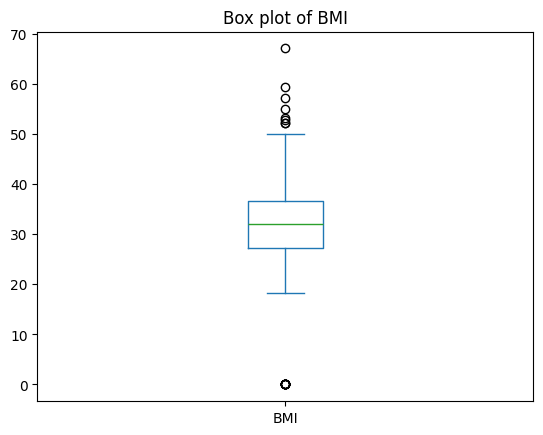

In [11]:
data['BMI'].plot(kind = 'box', title = 'Box plot of BMI')

<Axes: title={'center': 'histograms of Age'}, xlabel='Age', ylabel='Frequency'>

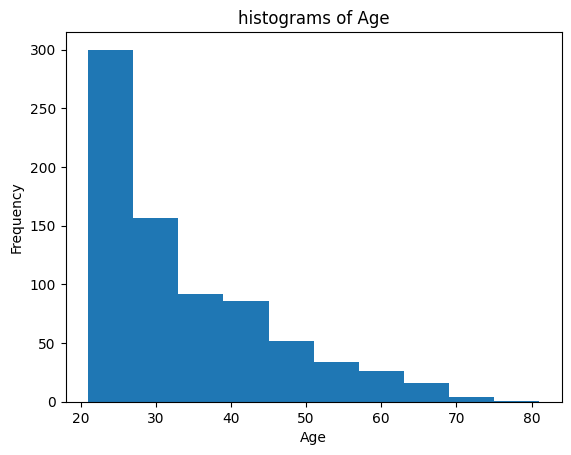

In [12]:
data['Age'].plot(kind = 'hist', xlabel ='Age',title = 'histograms of Age')

<Axes: >

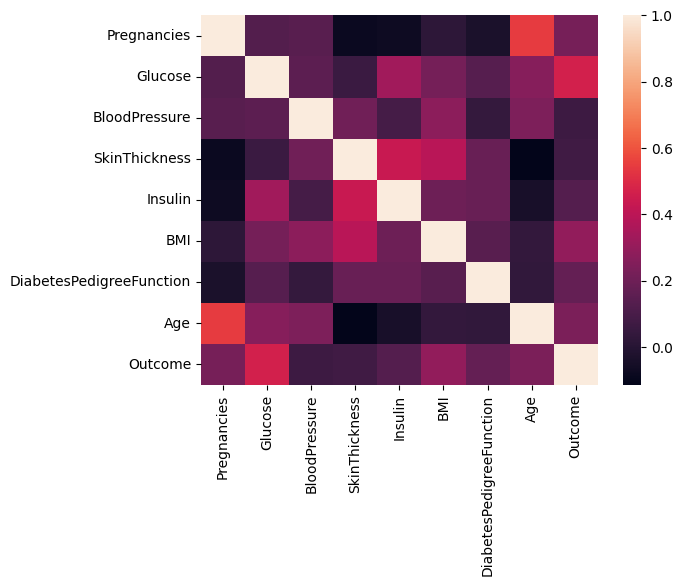

In [13]:
import seaborn as sns
sns.heatmap(data.corr())

In [14]:
x = data.drop(columns = 'Outcome').values
y = data['Outcome'].values

In [15]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    """
    Splits dataset into train and test sets.
    """
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

X = data.drop(columns='Outcome').values
y = data['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


In [16]:
def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points.
    """
    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")

    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance
try:
    point1 = np.array([3, 4])
    point2 = np.array([0, 0])
    result = euclidean_distance(point1, point2)
    expected_result = 5.0
    assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"
    print("Test passed successfully!")
except ValueError as ve:
    print(f"ValueError: {ve}")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Test passed successfully!


In [17]:
def knn_predict(X_test, X_train, y_train, k=3):
    """
    Predict the labels for the test data using the KNN algorithm.
    """
    predictions = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        k_nearest_neighbors_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train[k_nearest_neighbors_indices]
        predicted_label = np.bincount(k_nearest_labels).argmax()
        predictions.append(predicted_label)

    return np.array(predictions)

def compute_accuracy(y_true, y_pred):
    """
    Calculate the accuracy of predictions.
    """
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy


In [18]:
try:
    X_test_sample = X_test[:5]
    y_test_sample = y_test[:5]
    predictions = knn_predict(X_test_sample, X_train, y_train, k=3)
    print("Predictions:", predictions)
    print("Actual labels:", y_test_sample)
    assert predictions.shape == y_test_sample.shape, (
        "The shape of predictions does not match the shape of the actual labels."
    )
    print("Test case passed successfully!")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Predictions: [0 1 0 1 1]
Actual labels: [0 0 0 0 0]
Test case passed successfully!


Accuracy for k=1: 68.70%
Accuracy for k=2: 72.61%
Accuracy for k=3: 67.39%
Accuracy for k=4: 72.17%
Accuracy for k=5: 68.70%
Accuracy for k=6: 70.00%
Accuracy for k=7: 69.13%
Accuracy for k=8: 71.30%
Accuracy for k=9: 70.00%
Accuracy for k=10: 71.74%
Accuracy for k=11: 73.04%
Accuracy for k=12: 73.91%
Accuracy for k=13: 74.35%
Accuracy for k=14: 72.61%
Accuracy for k=15: 73.91%
Accuracy for k=16: 73.48%
Accuracy for k=17: 72.61%
Accuracy for k=18: 71.30%
Accuracy for k=19: 72.17%
Accuracy for k=20: 70.87%


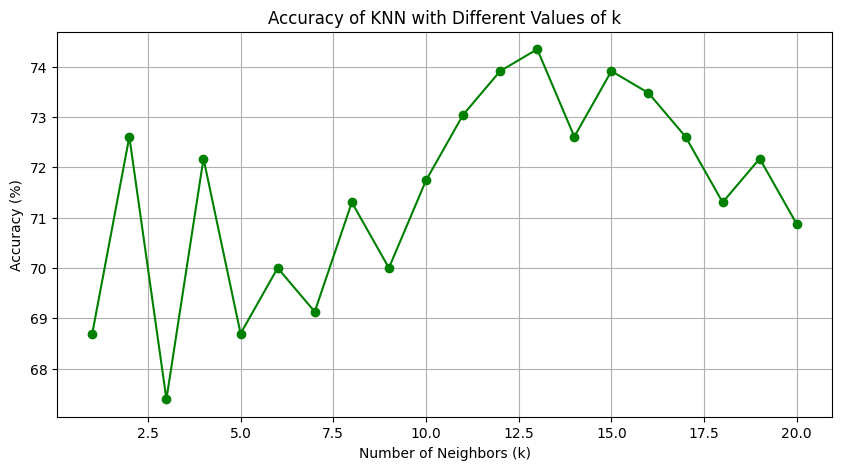

Experiment completed. Check the plot for the accuracy trend.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    """
    Run KNN predictions for different values of k and plot the accuracies.
    """
    accuracies = {}
    for k in k_values:
        predictions = knn_predict(X_test, X_train, y_train, k)
        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy
        print(f"Accuracy for k={k}: {accuracy:.2f}%")
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, list(accuracies.values()), marker="o", linestyle="-", color="g")
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy of KNN with Different Values of k")
    plt.grid(True)
    plt.show()

    return accuracies
k_values = range(1, 21)
try:
    accuracies = experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
    print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
    print(f"An unexpected error occurred during the experiment: {e}")
